In [24]:
import pandas as pd
import seaborn as sns

## Task1. Create a .CSV file that includes all of the information shown above. You are required to use a "wide" structure similar to how the information appears above, so that you can practice both data tidying and the data wrangling transformations described in Chapter 8 of the "Python for Data Analysis" textbook. Load your .CSV file into your GitHub repository.

In [25]:
filename = "https://raw.githubusercontent.com/mhan1/DAV-5400/master/week9.csv"

In [26]:
df = pd.read_csv(filename)

In [27]:
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


- Task1. I loaded my "week9.csv" file into my GitHub repository and read on the Jupyter Notebook as above.

## Task2. Read your .CSV filr from your GitHub Repository into a Jupyter Notebook, and use your knowledge of combining and reshaping data in Pandas to tidy and transform your data. Your reshaping/transformational steps must include converting the above table to a "tidy" long format. Additional transformational steps (e.g., filling in missing data values, renaming, columns, etc.) should be performed as needed to ensure that your data is, in fact, "tidy".

In [28]:
# sanity check
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


- I am dropping the third row (index 2) which has null values.

In [29]:
df = df.drop([2])

In [30]:
#sanity check
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [31]:
tidy1 = pd.DataFrame(df)

In [32]:
tidy1

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [33]:
#naming the columns
tidy1.columns = pd.Index(['Airlines', 'Arrival', 'Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])

In [34]:
tidy1

,Airlines,Arrival,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [35]:
#Replacing the first NaN element in tidy1 with 'ALASKA'.
tidy2 = tidy1.fillna(value='ALASKA', limit=1)

In [36]:
tidy2

,Airlines,Arrival,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [37]:
#Replacing the first NaN element in tidy2 with 'AM WEST'
tidy3 = tidy2.fillna(value='AM WEST', limit=1)

In [38]:
tidy3

,Airlines,Arrival,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [39]:
#Converting the table to Long format using 'Airlines' and 'Arrival' as the keys and the other columns as data values.
tidy4 = tidy3.melt(id_vars = ['Airlines', 'Arrival'], value_vars = ['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])

In [40]:
tidy4

,Airlines,Arrival,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [41]:
#Renaming the column
tidy4.rename(columns={"variable":"City"}, inplace=True)
tidy4

,Airlines,Arrival,City,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


- The data above is now "tidy" format.
- Each row is a single observation, that is, each destination has the frequency of either on-time or delayed arrival by each airline in respective row.
- This 'tidy' data can now be used to answer the analytical questions.

## Task3. Using your reshaped/transformed data, perform analysis to compare the arrival delays for the two airlines. Some questions to answer: For each city, which airline had the best on time performance?; Which airline had the best overall on time performance?

In [42]:
tidy4

,Airlines,Arrival,City,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


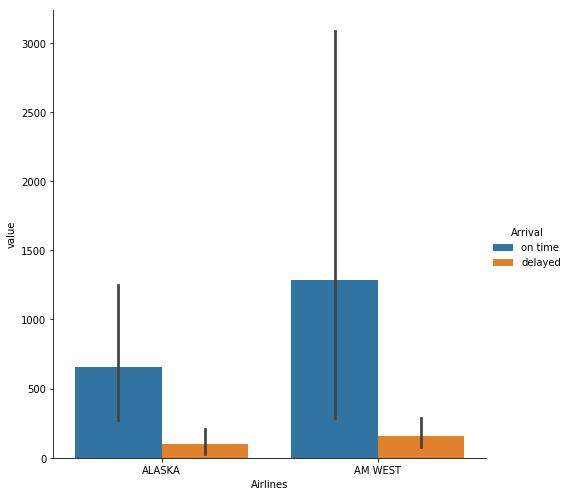

In [43]:
#To answer which airline had the best overall on time performance, I visualize the data as below.
sns.catplot(x='Airlines', y='value', hue='Arrival', kind='bar', data=tidy4, height=7, ci=95);

- Above bar chart allows me to compare the arrival delays for the two airlines. ALASKA airline has smaller frequency of arrival delay than AM WEST airline, although the difference of mean value of frequencies of delayed arrival is not as big as the difference for the on-time arrival.

- Also, based on the above bar chart, AM WEST airline has more frequency of "on-time" arrival than ALASKA airline. Even though AM WEST has a little larger mean value of frequency of "delayed" arrival, the difference between them are much smaller than the difference between the mean values of "on-time" arrival frequencies. In addition, the difference between on-time and delayed arrival within AM WEST airline is larger than the one within ALASKA airline, implying that the on-time arrival percentage of the total flights in each airline is higher in AM WEST airline. Taken all together, I can conclude that AM WEST has better overall on-time performance in terms of arrival time.

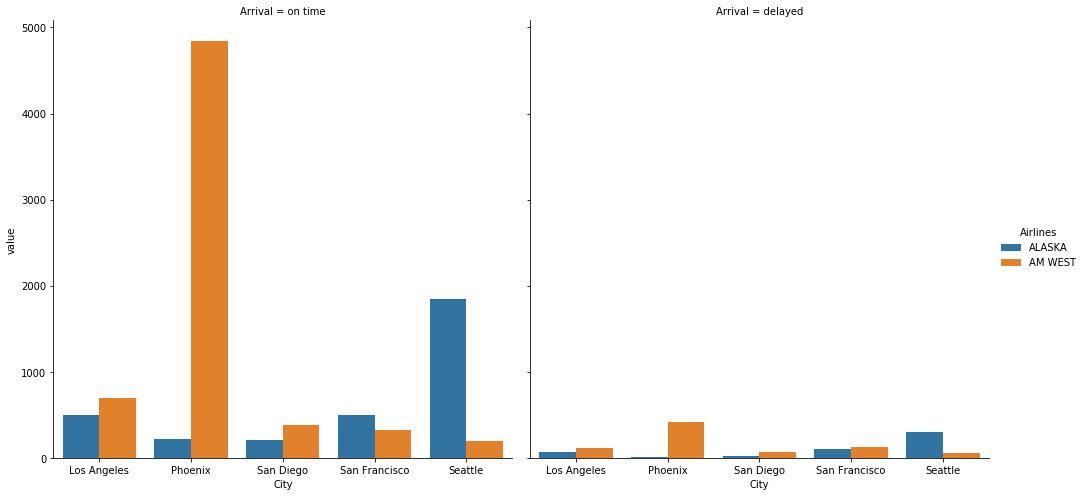

In [44]:
#To answer the question, for each city which airline had the best on time performance, I visualize the data as below.
sns.catplot(x="City", y="value", col="Arrival", hue="Airlines", data=tidy4, kind='bar', height=7);

Based on the above bar chart, 
- For Los Angeles, AM WEST airline had better on-time performance.
- For Phoenix, AM WEST airline had better on-time performance.
- For San Diego, AM WEST airline had beter on-time performance.
- For San Francisco, ALASKA airline had better on-time performance.
- For Seattle, ALASKA airline had better on-time performance.

## Task4. Given your "tidy" long format structure, consider if any changes you would make to the visual presentation of the data if you were then asked to transform your "long" data back into a "wide" format:would you mimic the structure of the graphic shown above? If not, how might you transform your "long" data to "wide" format to make its "wide" presentation easier to understand and work with? Provide an example of your recommendation.

In [45]:
# long, tidy data sanity check.
tidy4

,Airlines,Arrival,City,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [46]:
#Producing pivot tables from tidy4 for the presentation purpose.
wide1 = pd.pivot_table(tidy4, values='value', index=['Airlines','City'], columns='Arrival')
wide1

Arrival                 delayed  on time
Airlines City                           
ALASKA   Los Angeles       62.0    497.0
         Phoenix           12.0    221.0
         San Diego         20.0    212.0
         San Francisco    102.0    503.0
         Seattle          305.0   1841.0
AM WEST  Los Angeles      117.0    694.0
         Phoenix          415.0   4840.0
         San Diego         65.0    383.0
         San Francisco    129.0    320.0
         Seattle           61.0    201.0

- I think moderately "wide" format is better for the visual presentation than "long" format. Also, I would change the original structure of the graphic to the above pivot table, because this table is easier to understand the dataset at a glance, than the original structure of the graphic. By placing the cities in one column instead of separate columns, the table looks more organized and simplified enabling the actual values(in this case, the frequency of delayed arrival and on-time arrival to each city) to be displayed in the respective columns. Above pivot table is easier to understand/calculate the overall performance of each airline for the each destination city in terms of arrival time.